# Steps

1. take a dataset with few stocks which has their stock price given for long period of time
2. Use two methods to find out the optimal portfolio and compare which can be better

    a) Mean variance optimization (Part1)

    a) Monte Carlo simulation (Part 1)
    
    b) Machine learning neural network (Part 2) 
2. use sharpe ratio to determine which portfolio is optimal
3. initialize how many portfolio's you want to create
4. assign random weights to them and calculate SR for each portfolio and plot the efficient frontier.
5. after determining best portfolio, display what amount of money should ne invested in each stock according to the weigts assignmened for the best portfolio.


In [7]:
#required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 
#from pandas_datareader import data 
from datetime import datetime
from scipy.optimize import minimize
import yfinance as yf
from datetime import datetime,  timedelta

In [9]:
#S&P 500 companies
ticker_symbol = ['NVDA', 'JPM','WMT','BAC','NKE']

In [20]:
#DATASET 

#import the data for the companies mentioned using yfinance for a 10 year period till today.

# Define the start and end dates
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=10*365)).strftime('%Y-%m-%d')

# Fetch the data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the dataframe
data = data ['Adj Close']
data

[*********************100%%**********************]  5 of 5 completed


Ticker,BAC,JPM,NKE,NVDA,WMT
Date,,,,,
2014-06-27,15.330000,57.529999,38.840000,0.459500,25.113333
2014-06-30,15.370000,57.619999,38.775002,0.463500,25.023333
2014-07-01,15.600000,57.570000,39.000000,0.468750,25.093332
2014-07-02,15.850000,56.970001,38.895000,0.467000,25.206667
2014-07-03,16.030001,57.049999,39.224998,0.471250,25.250000
...,...,...,...,...,...
2024-06-14,39.240002,193.779999,93.389999,131.880005,67.019997
2024-06-17,39.509998,194.979996,95.000000,130.979996,67.419998
2024-06-18,39.990002,197.000000,94.779999,135.580002,67.599998


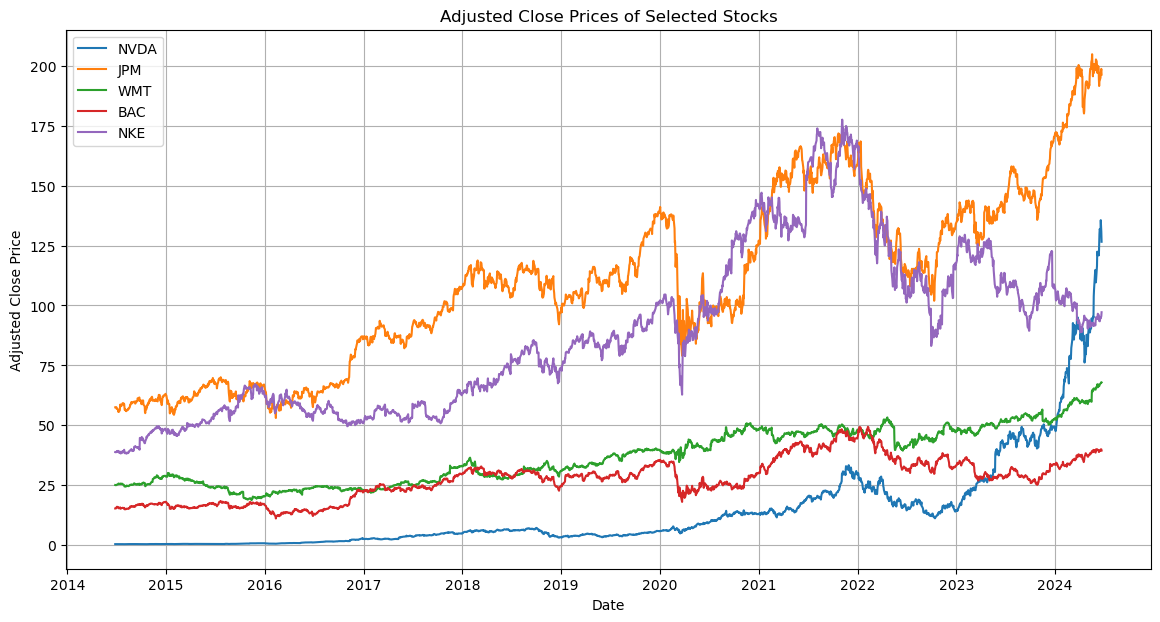

In [21]:
#plot raw data of stocks 

plt.figure(figsize=(14, 7))
for ticker in ticker_symbol:
    plt.plot(data[ticker], label=ticker)

# Customize the plot
plt.title('Adjusted Close Prices of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
#Check for null values in dataset 

data.isna().sum()

Ticker
BAC     0
JPM     0
NKE     0
NVDA    0
WMT     0
dtype: int64

In [28]:
data.describe()

Ticker,BAC,JPM,NKE,NVDA,WMT
count,2513.000000,2513.000000,2513.000000,2513.000000,2513.000000
mean,27.584819,110.050832,88.228900,14.105087,37.021383
std,8.626522,36.279659,33.583921,20.189592,11.483079
min,11.160000,53.070000,38.174999,0.419750,18.806667
25%,21.420000,83.889999,57.459999,2.460750,26.016666
50%,28.389999,109.400002,84.790001,5.978000,36.173332
75%,33.169998,137.440002,109.360001,17.358250,47.200001
max,49.380001,204.789993,177.509995,135.580002,68.010002


As you can see the values of mean for JPM and NVDA have larger differences between them and thus we need to bring all the values on a normalized scale. Therefore we need to normalize the data for stable results and also to make sure no skewing of results happen.

## Daily returns using log transformation

In [35]:
#normalize the data- use log transformation because it works well for stabilising variance and reduce skewness of data

data_normalized = np.log(data / data.shift(1))
data_normalized.tail()


Ticker,BAC,JPM,NKE,NVDA,WMT
Date,,,,,
2024-06-14,-0.000509,0.000619,-0.008424,0.017363,0.004786
2024-06-17,0.006857,0.006173,0.017093,-0.006848,0.005951
2024-06-18,0.012076,0.010307,-0.002318,0.034517,0.002666
2024-06-20,0.000000,0.008441,0.008301,-0.036045,0.006047
2024-06-21,-0.012582,-0.012001,0.016706,-0.032721,-0.001471


Text(0.5, 1.0, 'Log Returns')

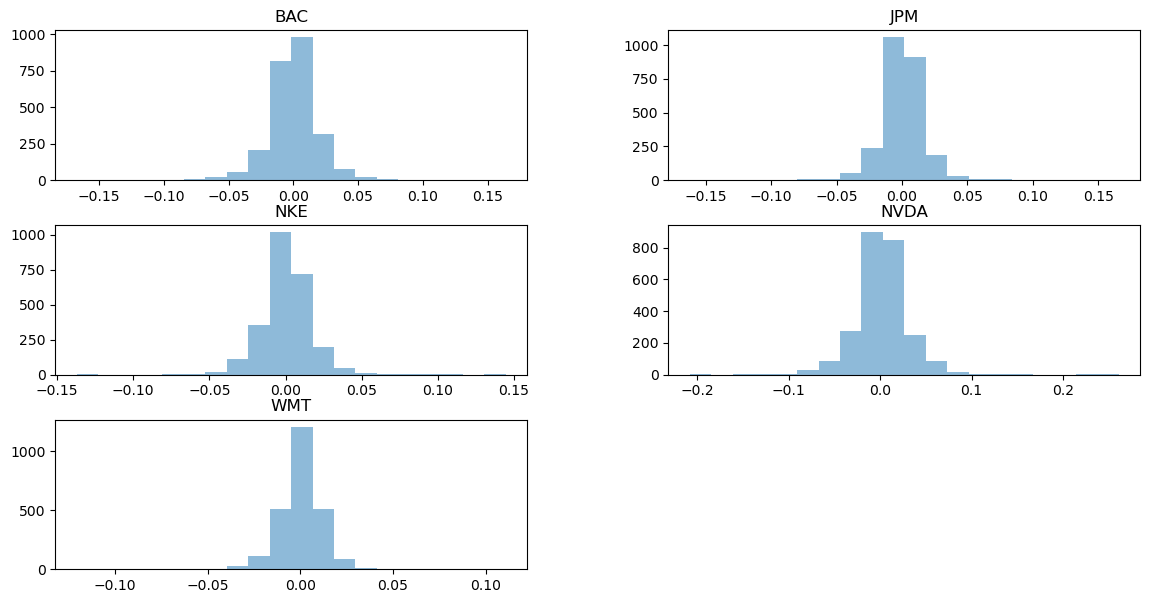

In [36]:
#plot log returns of the stock

data_normalized.hist(bins=20, alpha=0.5, figsize=(14, 7), grid=False)
plt.title('Log Returns')

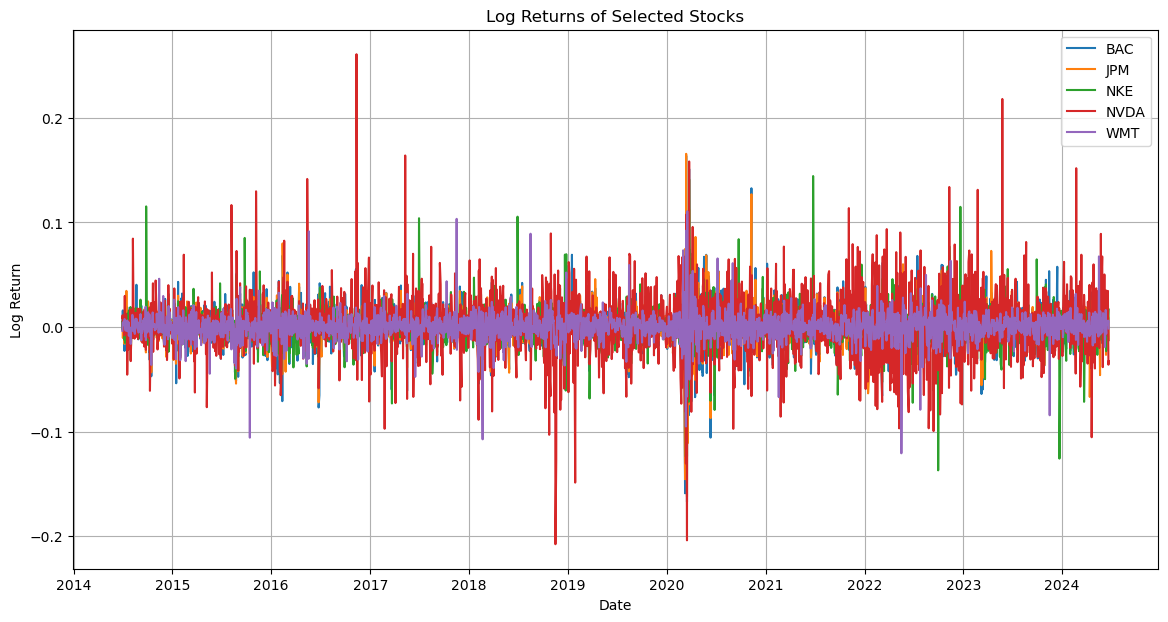

In [37]:
plt.figure(figsize=(14, 7))

for ticker in data_normalized:
    plt.plot(data_normalized.index, data_normalized[ticker], label=ticker)

plt.title('Log Returns of Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)
    risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return returns, risk

## Mean Variance Optimization

1) Risk (varaince) vs Return graph - Efficient Frontier

## Monte Carlo Simulation

In [65]:
#Plot efficient frontier
# Number of simulations
np.random.seed(5)
n_portfolios = 10000
weights_record=[]

# Arrays to store simulation results
results = np.zeros((3, n_portfolios))
portfolio_return=np.zeros((n_portfolios))
portfolio_risk=np.zeros((n_portfolios))

# Run simulations
for i in range(n_portfolios):
    weights = np.random.random(len(data_normalized.mean()*252))
    weights /= np.sum(weights)
    weights_record.append(weights)
    portfolio_return[i], portfolio_risk[i] = portfolio_performance(weights, data_normalized.mean()*252, data_normalized.cov()*252)
    sharpe_ratio = portfolio_return[i]/ portfolio_risk[i]
    results[0, i] = portfolio_return[i]
    results[1, i] = portfolio_risk[i]
    results[2, i] = sharpe_ratio

# Find the portfolio with the maximum Sharpe ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_allocation = weights_record[max_sharpe_idx]
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_risk = results[1, max_sharpe_idx]

print("Maximum Sharpe Ratio Portfolio Allocation:")
print("Allocation:", max_sharpe_allocation*100)
print("Return:", max_sharpe_return)
print("Risk:", max_sharpe_risk)




Maximum Sharpe Ratio Portfolio Allocation:
Allocation: [ 7.53015014  3.60488982  0.8658233  58.20177549 29.79736124]
Return: 0.3701623874709101
Risk: 0.3093679665576878


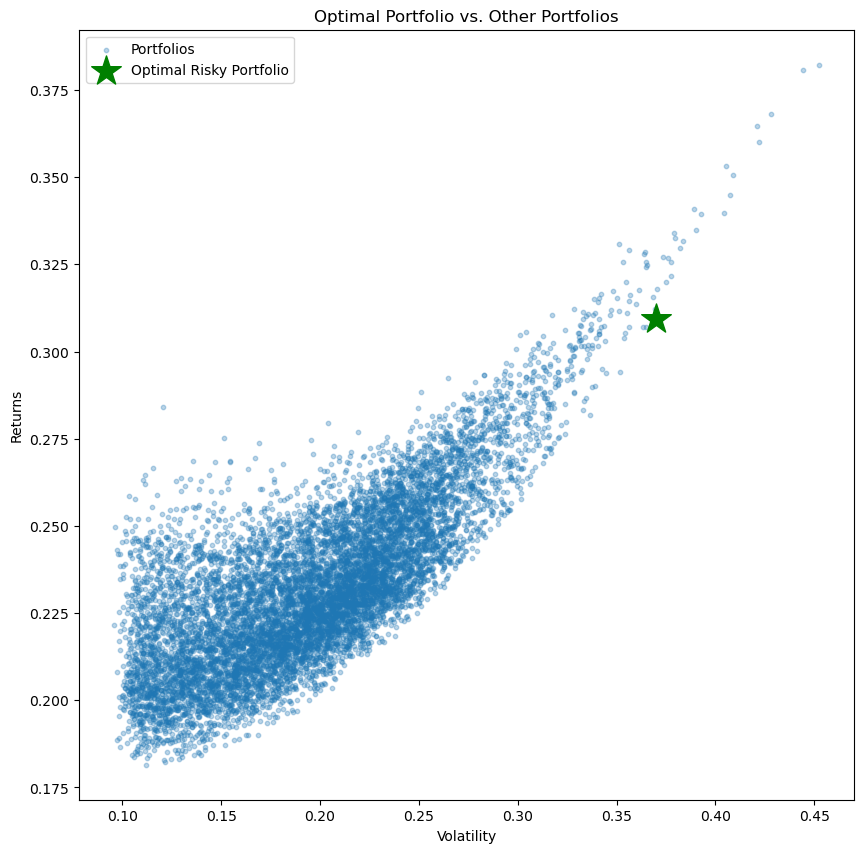

In [66]:
# Plotting the optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolio_return, portfolio_risk, marker='o', s=10, alpha=0.3, label='Portfolios')
plt.scatter(max_sharpe_return, max_sharpe_risk, color='g', marker='*', s=500, label='Optimal Risky Portfolio')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.title('Optimal Portfolio vs. Other Portfolios')
plt.legend()
plt.show()